In [41]:
import numpy as np#linear algebra
import pandas as pd#data preprocessing,CSV files
import pickle#saving and loading trained model
from os import path
#importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import(StandardScaler,OrdinalEncoder,LabelEncoder,MinMaxScaler,OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer,MaxAbsScaler,RobustScaler,PowerTransformer
#importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [42]:
# from google.colab import drive
# drive.mount('/content/drive')


In [43]:
# import glob
# #path to your folder containing csv files
# folder_path="/content/drive/MyDrive/data/raw/"
# #get  a list of all csv files in the folder
# csv_files=glob.glob(folder_path + "*.csv")
# #Read all the csv files and combine them into one dataframe
# df_list=(pd.read_csv(file) for file in csv_files)
# df=pd.concat(df_list,ignore_index=True)
# df.head()


In [44]:
import pandas as pd
import glob
import os

# 1️⃣ Path to your folder containing CSVs
folder_path = r"E:\data"  # use r"" to handle backslashes

# 2️⃣ Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 3️⃣ Check if files are found
if not csv_files:
    raise ValueError("No CSV files found in the folder:", folder_path)

print(f"Found {len(csv_files)} CSV files.")
print("Some example files:", csv_files[:5])

# 4️⃣ Read all CSVs and store in a list
df_list = [pd.read_csv(file) for file in csv_files]

# 5️⃣ Concatenate all dataframes into one
df = pd.concat(df_list, ignore_index=True)

# 6️⃣ Check the first few rows
print(df.head())
print("Shape of combined dataframe:", df.shape)



Found 8 CSV files.
Some example files: ['E:\\data\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'E:\\data\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 'E:\\data\\Friday-WorkingHours-Morning.pcap_ISCX.csv', 'E:\\data\\Monday-WorkingHours.pcap_ISCX.csv', 'E:\\data\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv']
    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4

In [45]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [46]:
#display the shape and the find the concatinated dataframe
nRow,nCol=df.shape
print(f"Rows:{nRow},Columns: {nCol}")

Rows:2830743,Columns: 79


In [47]:
df.columns=df.columns.str.strip()
df['Label'].value_counts()

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

# Check NULL values column-wise (most common)

In [48]:
df.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

# Check if ANY NULL exists (quick check)

In [49]:
df.isnull().values.any()


np.True_

# Check rows that contain NULL values

In [50]:
df[df.isnull().any(axis=1)]


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
6796,36812,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
14739,53581,0,1,1,0,0,0,0,0.0,0.0,...,44,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
15047,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
209728,18467,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
238569,13370,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740049,50834,0,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2767532,45113,0,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2791593,48698,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2809052,22567,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Count total NULL values in dataset

In [51]:
df.isnull().sum().sum()


np.int64(1358)

In [52]:
import numpy as np

num = df.select_dtypes(include=[np.number])

num.isna().sum()          # NaN per numeric column
np.isinf(num).sum()       # Inf per numeric column


Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64

In [53]:
np.isinf(num).sum().sum()


np.int64(4376)

# Check both NaN and Inf together

In [54]:


num = df.select_dtypes(include=[np.number])
nan_count = num.isna().sum().sum()
inf_count = np.isinf(num).sum().sum()

print("NaN:", nan_count, "Inf:", inf_count)


NaN: 1358 Inf: 4376


# handling the NaN and Inf


In [55]:

# Replace Inf with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Fill NaN safely
df = df.fillna(0)


In [56]:
num = df.select_dtypes(include=[np.number])

print("NaN after cleaning:", num.isna().sum().sum())
print("Inf after cleaning:", np.isinf(num).sum().sum())


NaN after cleaning: 0
Inf after cleaning: 0


In [57]:
df.shape

(2830743, 79)

In [58]:
import matplotlib.pyplot as plt  # for plotting graphs
import numpy as np               # for numerical operations and dtype checking
%matplotlib inline

def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    """
    This function plots the distribution of values for multiple columns in a DataFrame.
    Numeric columns are shown as histograms.
    Categorical columns (with few unique values) are shown as bar charts.

    Parameters:
    df: pandas DataFrame
        The dataset containing columns to plot
    n_graph_shown: int
        Maximum number of columns to plot
    n_graph_per_row: int
        Number of plots to show in each row
    """

    # Count unique values in each column
    nunique = df.nunique()

    # Select columns with 2 to 49 unique values for plotting
    columns_to_plot = df.columns[(nunique > 1) & (nunique < 50)]
    print(columns_to_plot)

    # Create a smaller DataFrame containing only selected columns
    df_to_plot = df[columns_to_plot]

    # Get the number of rows and columns in the filtered DataFrame
    n_rows, n_cols = df_to_plot.shape

    # Calculate how many rows of plots we need in the figure
    n_graph_row = (n_cols + n_graph_per_row - 1) // n_graph_per_row  # integer division

    # Create the figure with calculated size
    plt.figure(num=None,
               figsize=(6 * n_graph_per_row, 8 * n_graph_row),  # width x height in inches
               dpi=80,                                         # resolution
               facecolor='w',                                  # figure background color
               edgecolor='k')                                  # figure border color

    # Loop through each selected column (up to n_graph_shown)
    for i, col_name in enumerate(columns_to_plot[:n_graph_shown]):
        # Create a subplot in the grid
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)

        # Get data of the current column
        column_data = df_to_plot[col_name]

        # Check if the column is numeric
        if np.issubdtype(column_data.dtype, np.number):
            # If numeric, plot histogram
            column_data.hist()
        else:
            # If categorical, count unique values and plot bar chart
            value_counts = column_data.value_counts()
            value_counts.plot.bar()

        # Label y-axis
        plt.ylabel('counts')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        # Set the title of the subplot using f-string
        plt.title(f'{col_name} (column {i})')

    # Adjust spacing between subplots to prevent overlap
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

    # Display the figure
    plt.show()


Index(['Fwd PSH Flags', 'Fwd URG Flags', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'min_seg_size_forward', 'Label'],
      dtype='object')


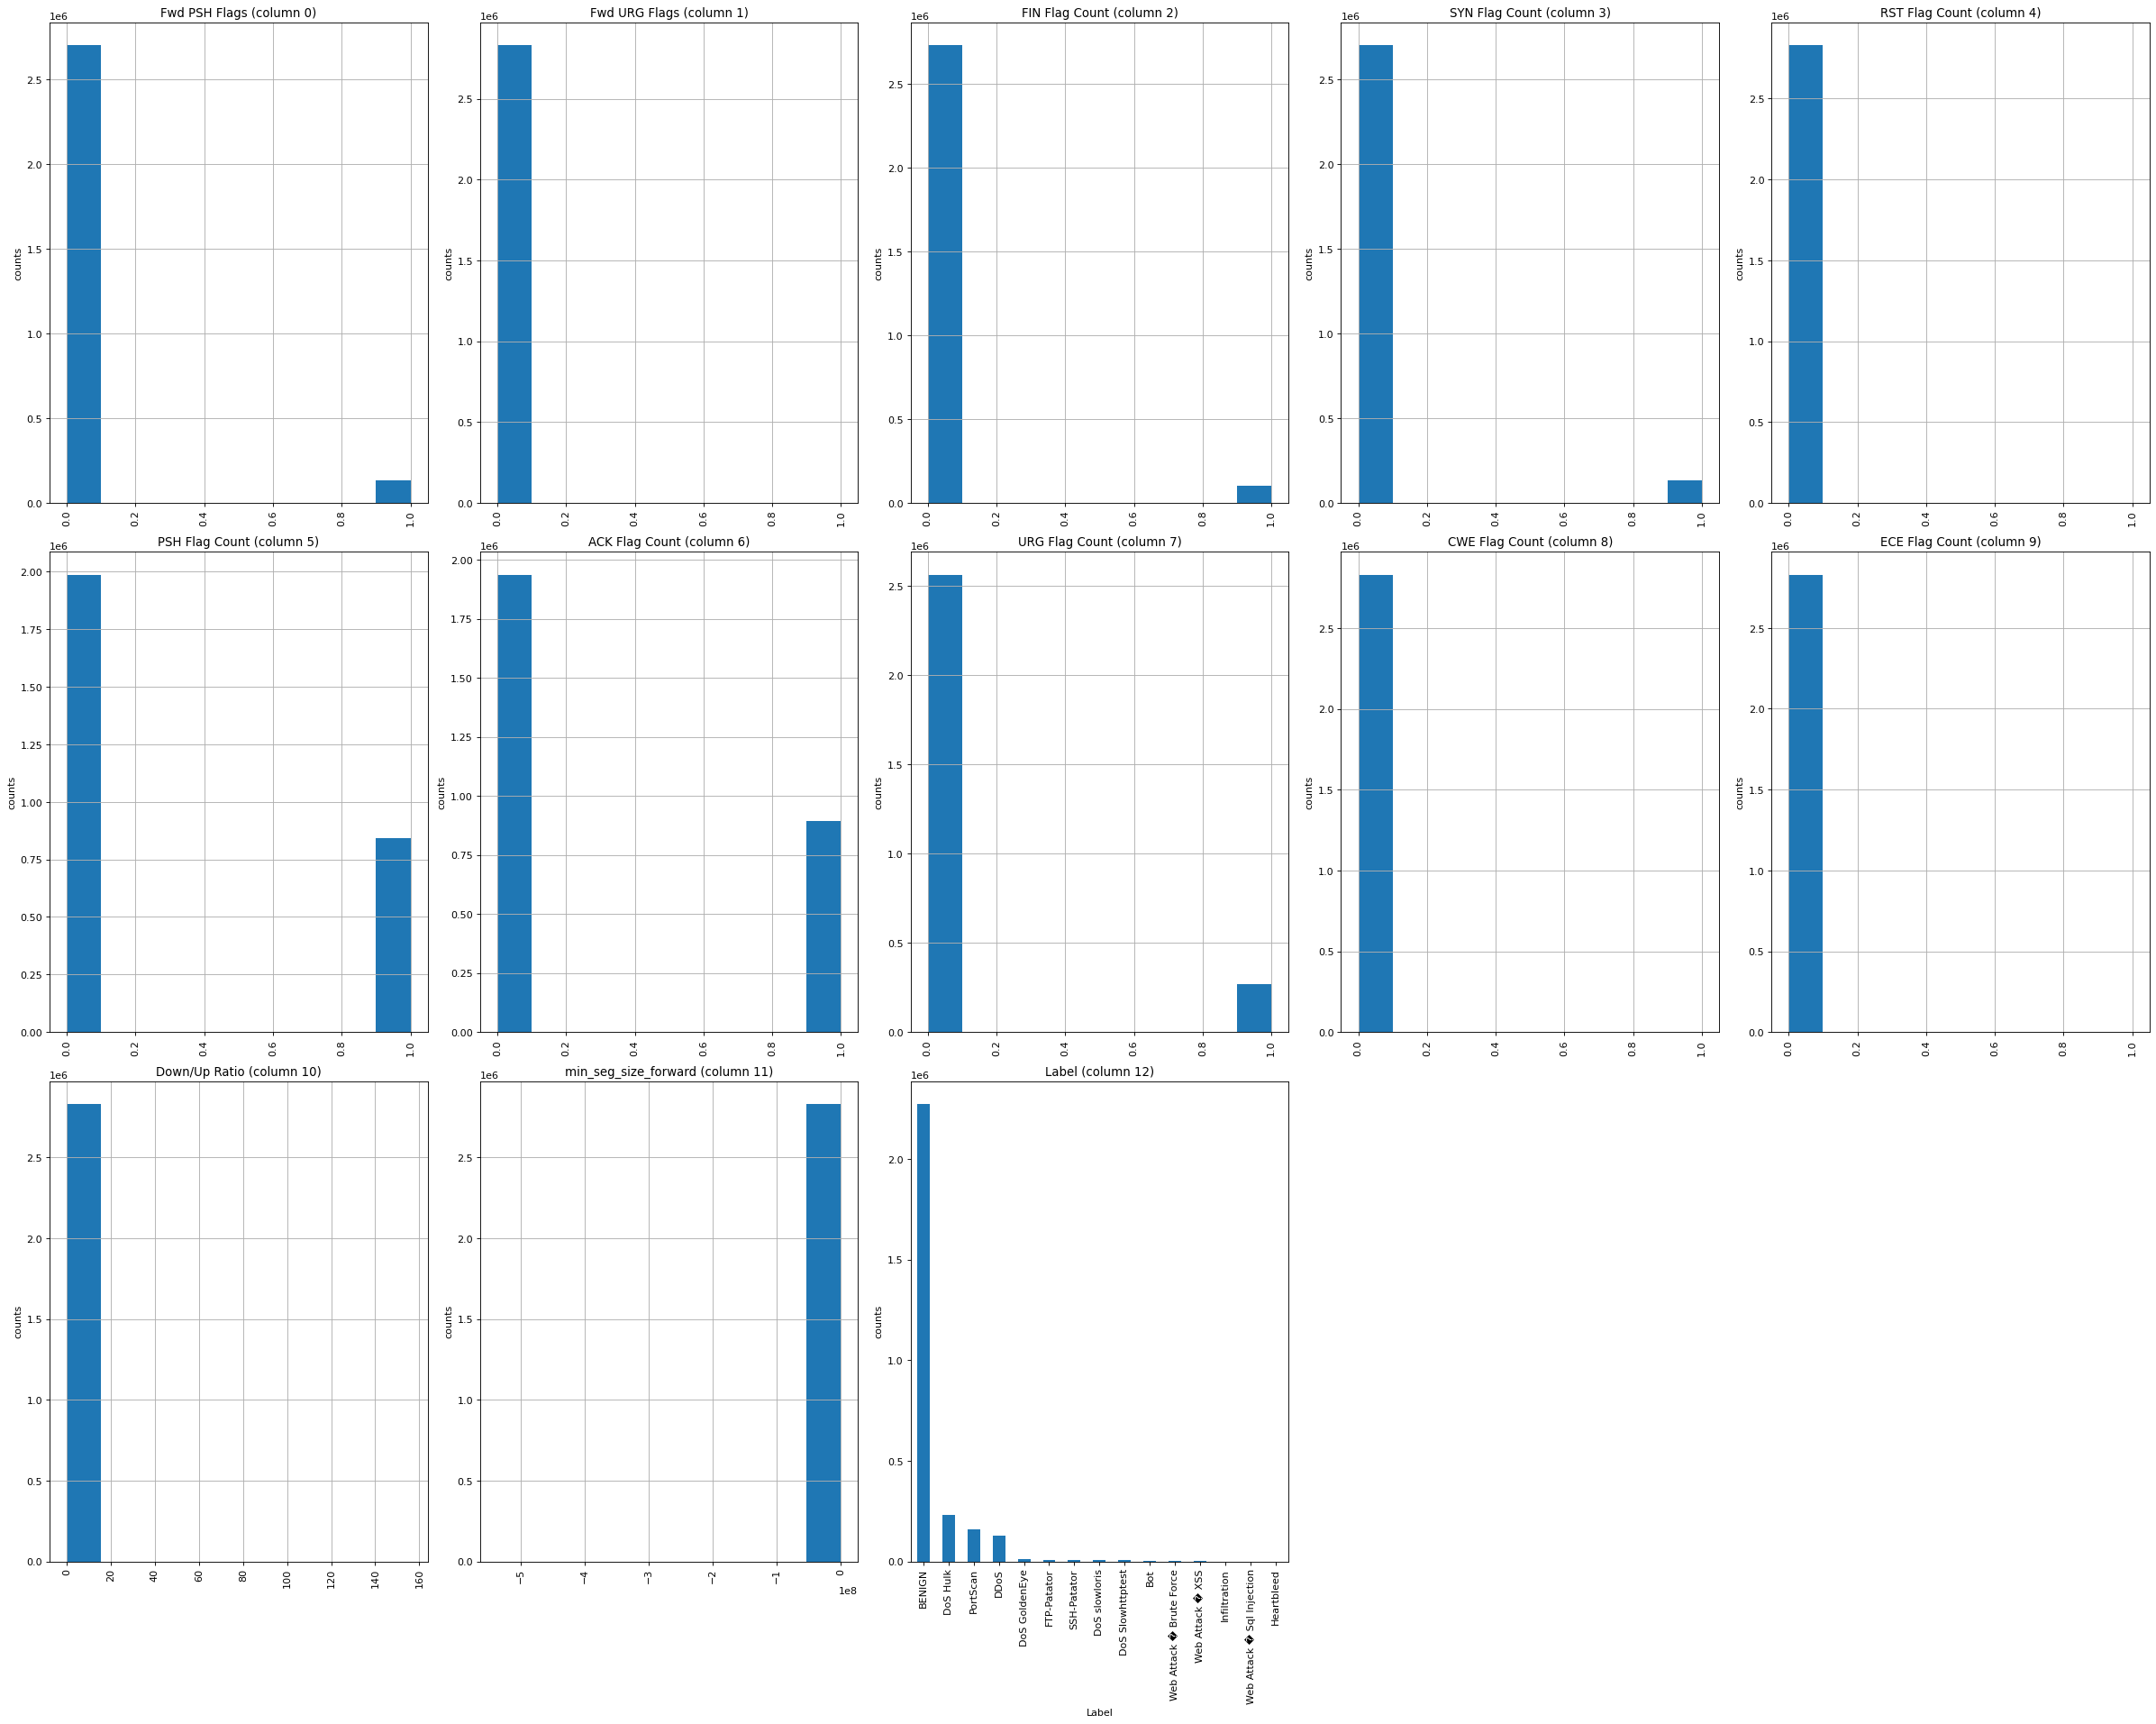

In [59]:
plt.rcParams['figure.figsize']=(30,30)
plot_per_column_distribution(df, 79, 5)

In [60]:
def bar_graph(feature):
  df[feature].value_counts().plot(kind="bar")



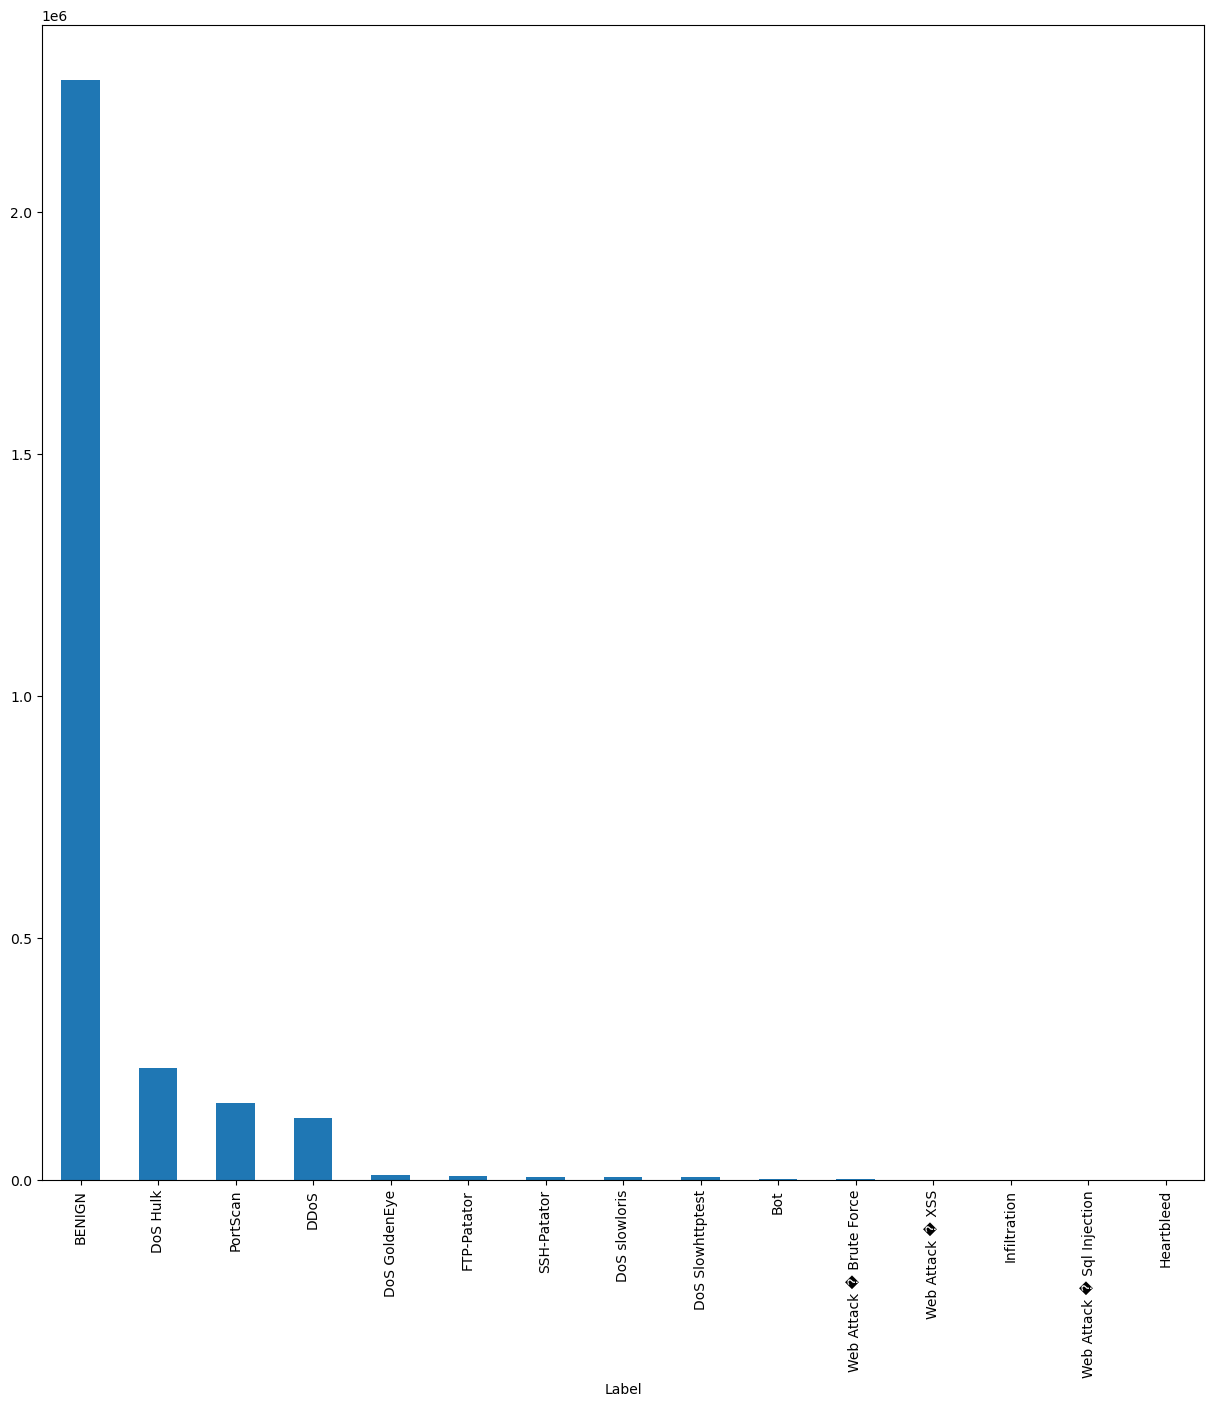

In [61]:
plt.rcParams['figure.figsize']=(15,15)
bar_graph("Label")


C:\Users\USER\AppData\Local\Temp\ipykernel_17132\425537385.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(a=df['Flow Duration'])


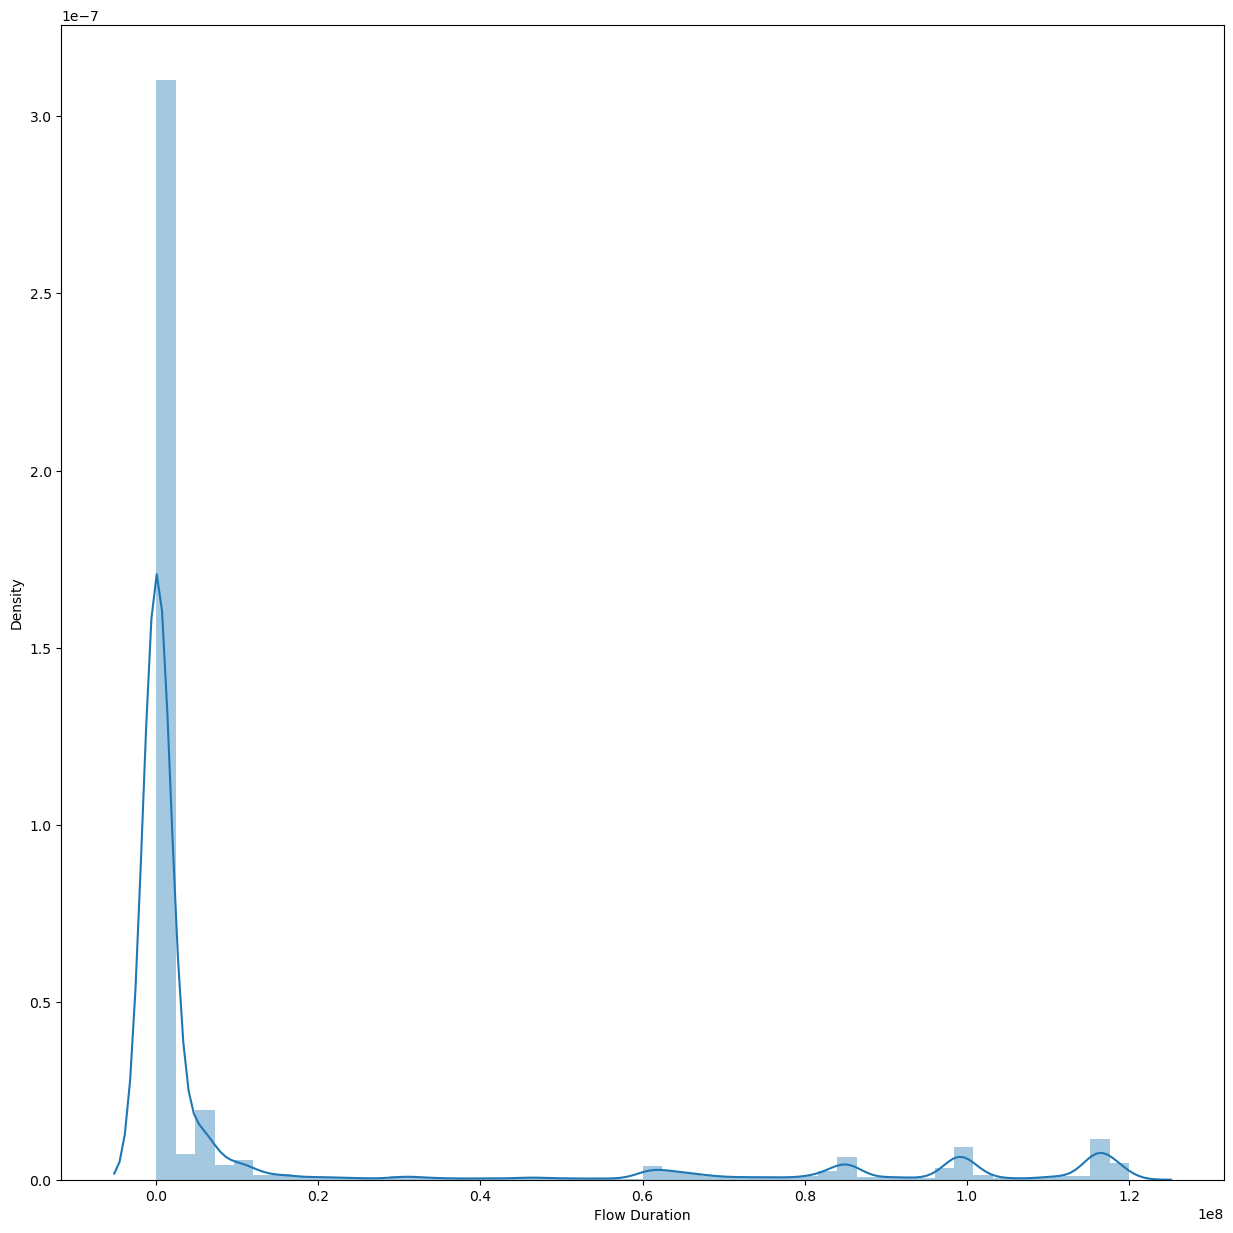

In [62]:
import seaborn as sns
p=sns.distplot(a=df['Flow Duration'])
plt.show()

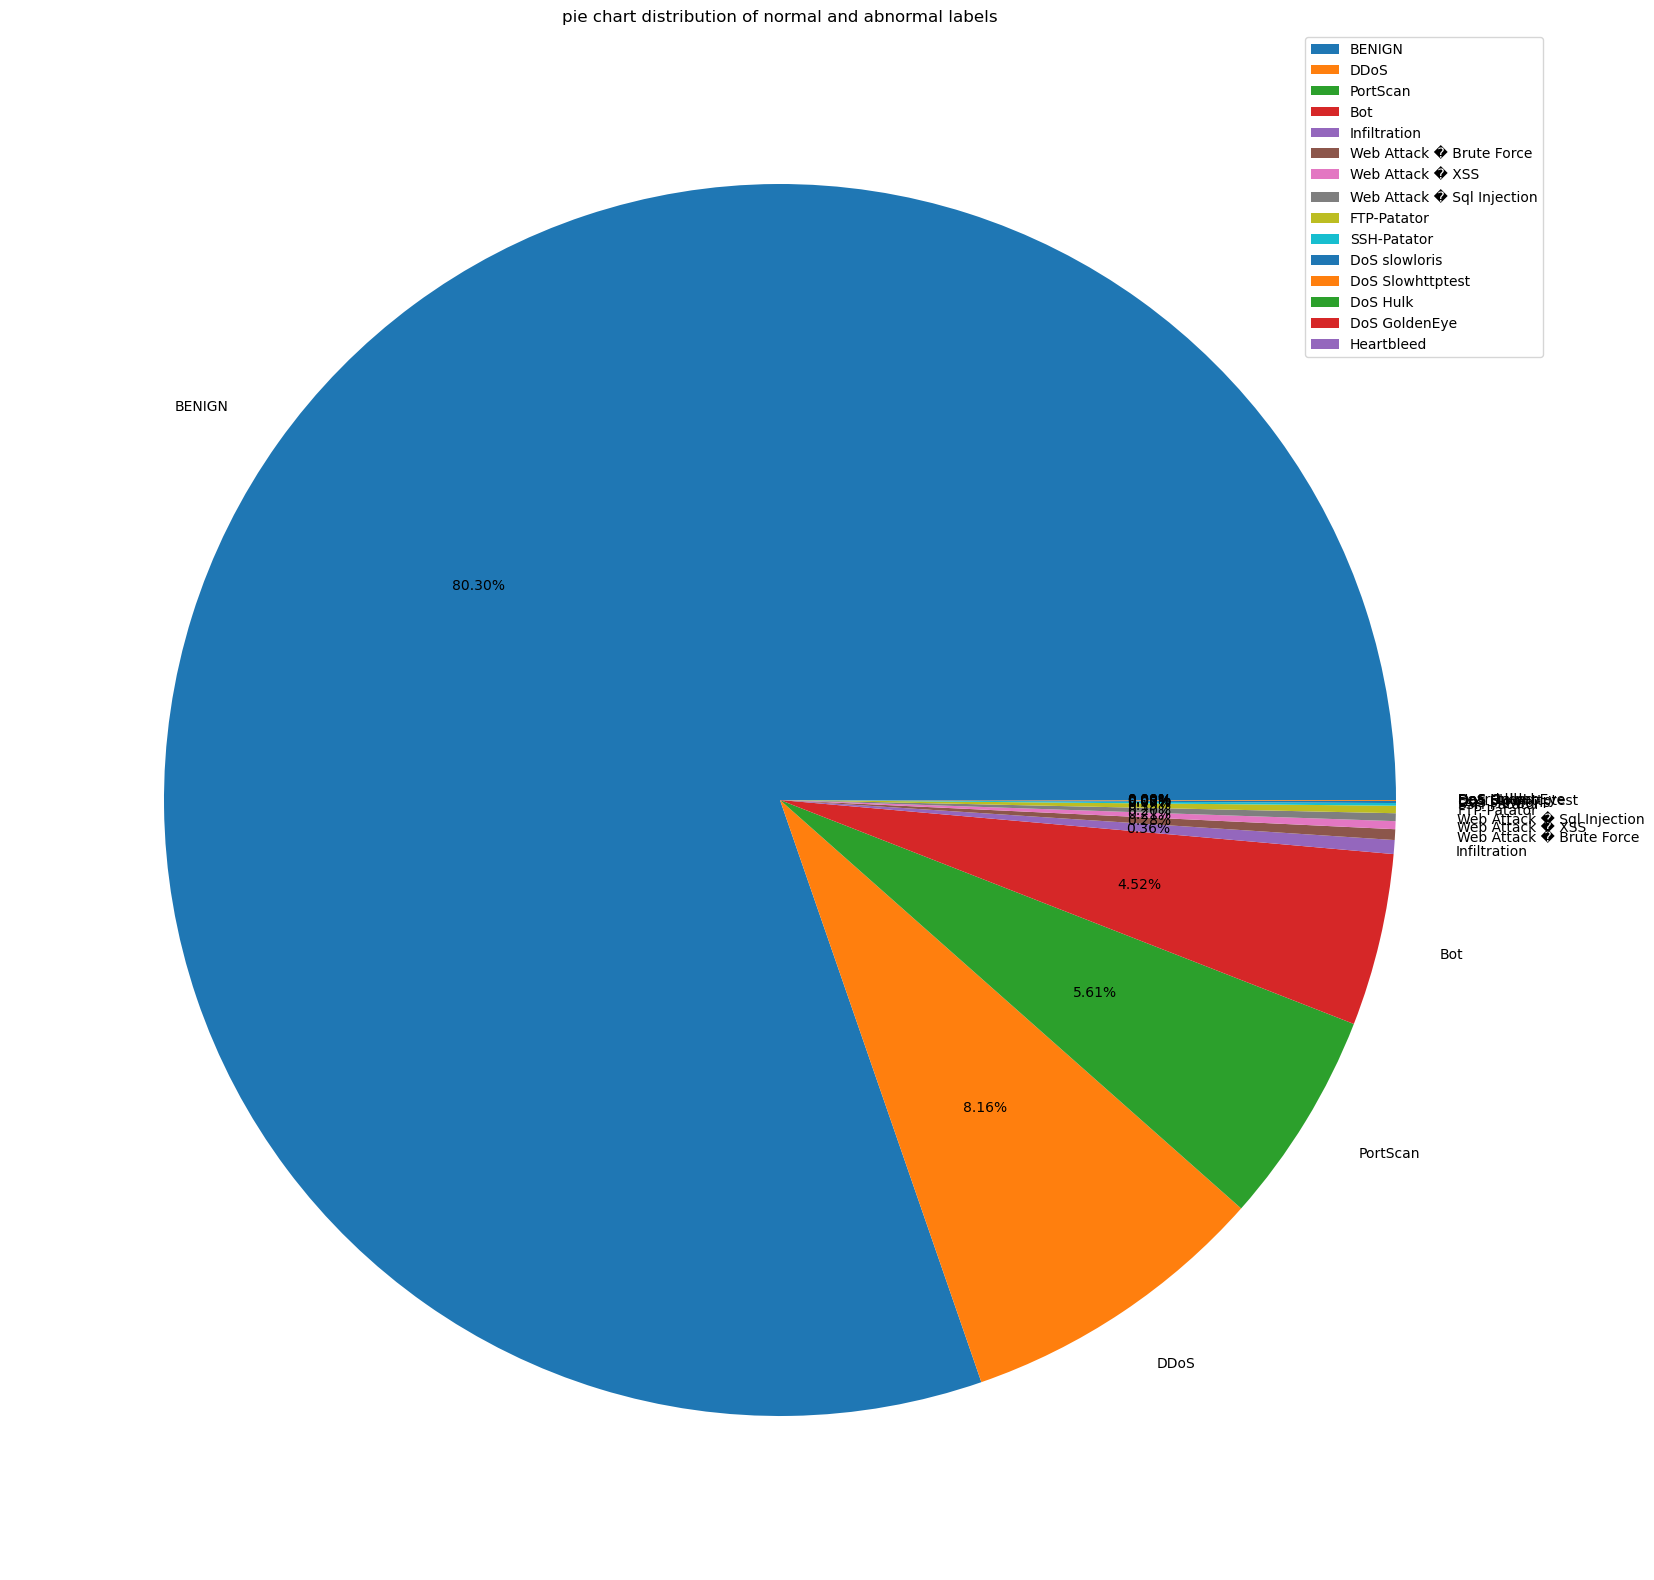

In [63]:
plt.figure(figsize=(20,20))
plt.pie(df['Label'].value_counts(),labels=df['Label'].unique(),autopct="%0.2f%%")
plt.title("pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [64]:
df.shape

(2830743, 79)

In [65]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)


Duplicate rows: 308381


In [66]:
df["Label"].value_counts()


Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [67]:
import re

def clean_label(label):
    label = str(label)

    # Replace common bad encoding characters
    label = label.replace("�", "-")

    # Replace multiple spaces or hyphens with single hyphen
    label = re.sub(r"[\s\-]+", "-", label)

    # Remove leading/trailing hyphens
    label = label.strip("-")

    return label


In [68]:
df["Label"] = df["Label"].apply(clean_label)


In [69]:
df["Label"].value_counts()


Label
BENIGN                      2273097
DoS-Hulk                     231073
PortScan                     158930
DDoS                         128027
DoS-GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS-slowloris                  5796
DoS-Slowhttptest               5499
Bot                            1966
Web-Attack-Brute-Force         1507
Web-Attack-XSS                  652
Infiltration                     36
Web-Attack-Sql-Injection         21
Heartbleed                       11
Name: count, dtype: int64

In [70]:
# create binary label
df["BinaryLabel"] = (df["Label"].astype(str).str.strip() != "BENIGN").astype(int)


In [71]:
print(df["BinaryLabel"].value_counts())


BinaryLabel
0    2273097
1     557646
Name: count, dtype: int64


In [72]:
#check the sanity of data
print(df.groupby("BinaryLabel")["Label"].nunique())


BinaryLabel
0     1
1    14
Name: Label, dtype: int64


In [73]:
df["BinaryLabel"] = (
    df["Label"]
    .astype(str)
    .str.strip()
    .str.upper()
    .ne("BENIGN")
    .astype(int)
)


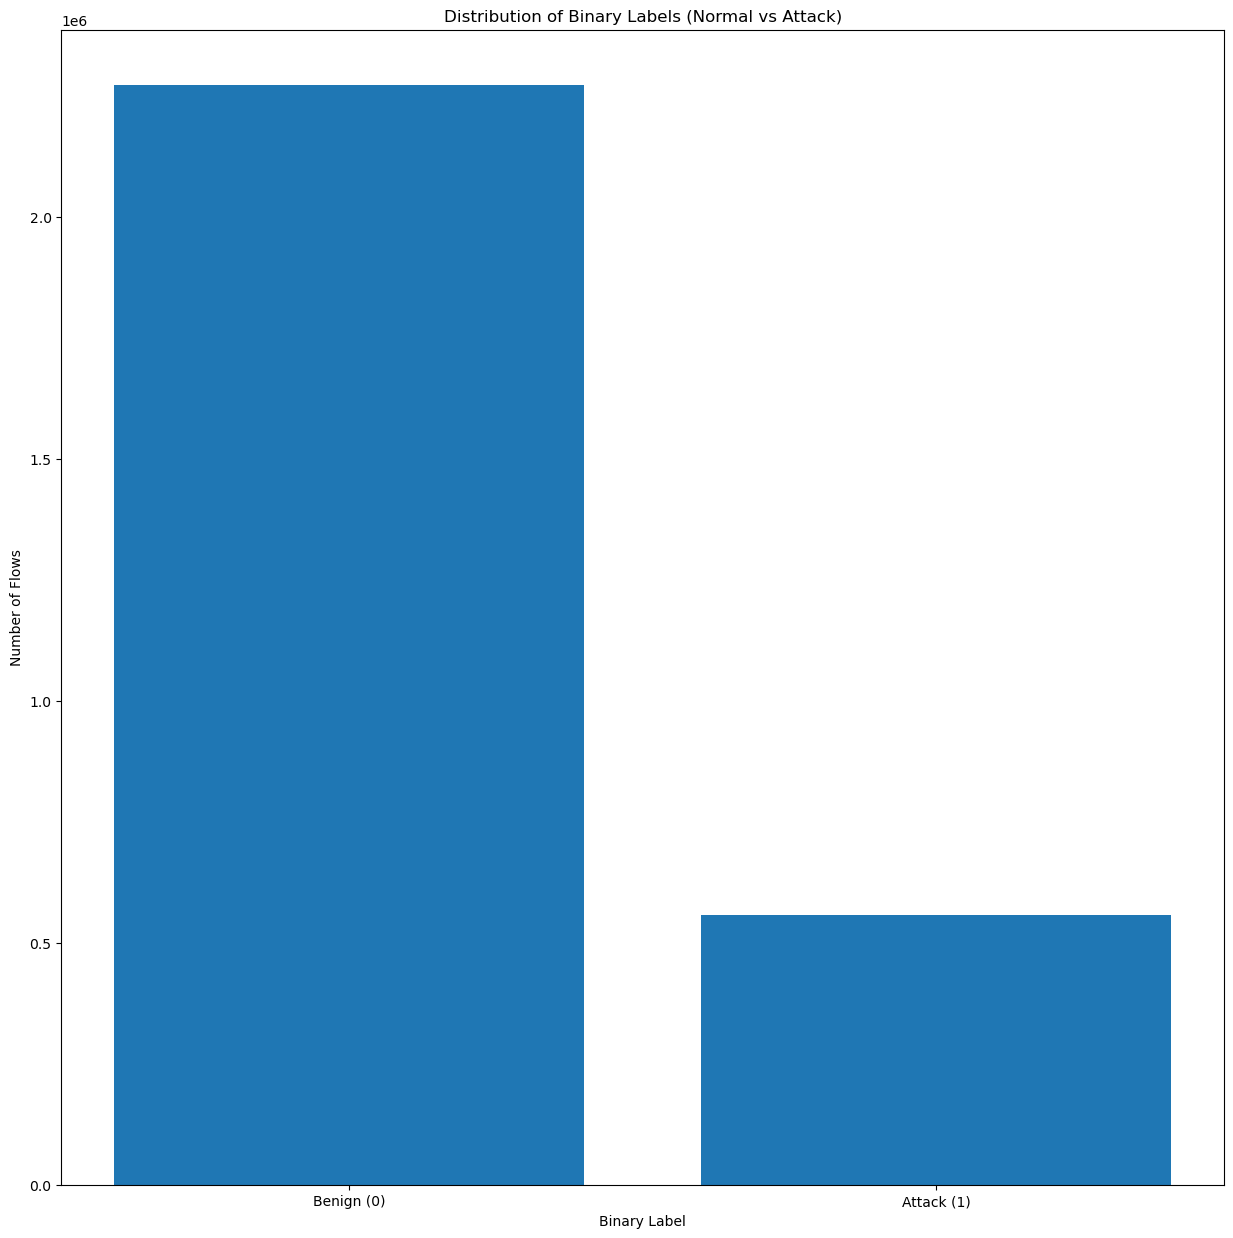

In [74]:

# Count values
label_counts = df["BinaryLabel"].value_counts().sort_index()

# Plot
plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.xticks([0, 1], ["Benign (0)", "Attack (1)"])
plt.xlabel("Binary Label")
plt.ylabel("Number of Flows")
plt.title("Distribution of Binary Labels (Normal vs Attack)")
plt.show()

In [75]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,BinaryLabel
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [76]:
# X = features, y = target (binary)
X = df.drop(columns=["Label", "BinaryLabel"])
y = df["BinaryLabel"]

print(X.shape, y.shape)
print(y.value_counts())

(2830743, 78) (2830743,)
BinaryLabel
0    2273097
1     557646
Name: count, dtype: int64


In [77]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


# Split first (to avoid leakage)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y #Same Benign/Attack ratio as original dataset
)


In [79]:
X_train.shape

(2264594, 78)

In [80]:
y_train.shape

(2264594,)

# Feature selection


In [81]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# --- Take a stratified sample from training data ---
sample_n = 200_000  # try 100k if still slow
idx0 = y_train[y_train == 0].sample(n=min(sample_n//2, (y_train==0).sum()), random_state=42).index
idx1 = y_train[y_train == 1].sample(n=min(sample_n//2, (y_train==1).sum()), random_state=42).index
idx = idx0.union(idx1)

X_fs = X_train.loc[idx]
y_fs = y_train.loc[idx]

print("FS sample shape:", X_fs.shape, y_fs.shape)

# --- Faster RF for importance ---
selector_model = RandomForestClassifier(
    n_estimators=80,          # reduce for speed (importance still works)
    max_depth=18,            # limit depth for speed
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=42,
    class_weight={0: 1, 1: 3}
)

selector_model.fit(X_fs, y_fs)

feat_imp = pd.Series(selector_model.feature_importances_, index=X_fs.columns).sort_values(ascending=False)

TOP_K = 20
top_features = feat_imp.head(TOP_K).index.tolist()

print("Top features selected:", len(top_features))
print(feat_imp.head(20))


FS sample shape: (200000, 78) (200000,)
Top features selected: 20
Init_Win_bytes_forward         0.084768
Destination Port               0.070424
Init_Win_bytes_backward        0.058355
Max Packet Length              0.054635
Bwd Packet Length Min          0.051352
Min Packet Length              0.049019
Fwd Packet Length Mean         0.048580
Average Packet Size            0.047905
Packet Length Std              0.031875
Avg Bwd Segment Size           0.031230
Fwd Packet Length Max          0.025584
Avg Fwd Segment Size           0.025012
Packet Length Variance         0.024549
Subflow Fwd Bytes              0.024226
Fwd Packet Length Min          0.020514
Fwd Header Length.1            0.018986
Fwd Header Length              0.018417
Bwd Packet Length Max          0.018242
Bwd Packet Length Mean         0.017379
Total Length of Bwd Packets    0.017215
dtype: float64


# Freeze and save these 20 features

In [82]:
# sort feature by importance
from joblib import dump

top_features = [
    "Init_Win_bytes_forward","Destination Port","Max Packet Length","Average Packet Size",
    "Min Packet Length","Bwd Packet Length Min","Init_Win_bytes_backward","Avg Bwd Segment Size",
    "Fwd Packet Length Mean","Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Mean",
    "Fwd Packet Length Max","Fwd Packet Length Min","Packet Length Variance","Packet Length Mean",
    "Bwd Packet Length Std","Avg Fwd Segment Size","URG Flag Count","Fwd Header Length"
]





# save the top 20 features

In [83]:
from joblib import dump
import os

MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
os.makedirs(MODEL_DIR, exist_ok=True)

dump(top_features, os.path.join(MODEL_DIR, "most_imp20_features.joblib"))
print("Saved top20_features.joblib")


Saved top20_features.joblib


# load the top 20 features

In [84]:
# from joblib import load
# import os


# PROJECT_DIR = r"C:\Users\USER\Desktop\ANIDSSS"
# MODEL_DIR = os.path.join(PROJECT_DIR, "models")

# os.makedirs(MODEL_DIR, exist_ok=True)
# MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"

# top_features = load(os.path.join(MODEL_DIR, "top20_features.joblib"))

# print("Top features loaded:", len(top_features))
# print(top_features)

In [85]:
import matplotlib.pyplot as plt

top20_imp = feat_imp.loc[top_features].sort_values(ascending=True)


In [86]:
top20_imp.info()


<class 'pandas.core.series.Series'>
Index: 20 entries, URG Flag Count to Init_Win_bytes_forward
Series name: None
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


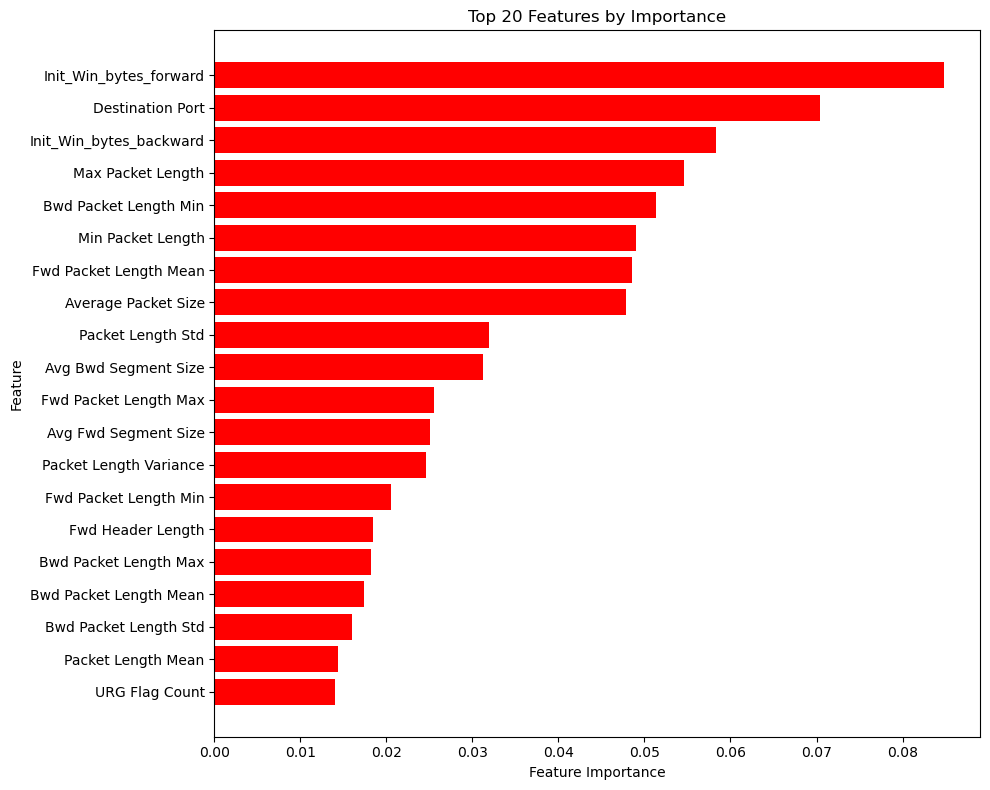

In [87]:
plt.figure(figsize=(10, 8))
plt.barh(top20_imp.index, top20_imp.values, color="red")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Features by Importance")
plt.tight_layout()
plt.show()


# apply selecte features to train and test

In [88]:
## top_features must be the same list you saved (length 20)

In [89]:
X_train_final = X_train[top_features].copy()
X_test_final  = X_test[top_features].copy()

print(X_train_final.shape, X_test_final.shape)


(2264594, 20) (566149, 20)


In [90]:
X_train_final.shape
X_test_final.shape

(566149, 20)

# scalinng of the data

In [91]:
# from sklearn.preprocessing import StandardScaler
# from joblib import dump

# scaler = StandardScaler()
# X_train_final = scaler.fit_transform(X_train_sel)
# X_test_final  = scaler.transform(X_test_sel)

# dump(scaler, os.path.join(MODEL_DIR, "scaler.joblib"))


In [92]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np

def evaluate_classifier(model, name, X_train, X_test, y_train, y_test, threshold=0.5, plot_cm=True):
    """
    Universal evaluation function for any binary classifier with predict_proba or decision_function.

    Parameters:
    - model      : Trained classifier (must have predict_proba or decision_function)
    - name       : Name of the model (string)
    - X_train    : Training features
    - X_test     : Testing features
    - y_train    : True training labels
    - y_test     : True testing labels
    - threshold  : Probability/score threshold for classifying positive class (default=0.5)
    - plot_cm    : Whether to plot confusion matrix (default=True)
    """

    print(f"\n===== {name} Evaluation =====\n")

    # Try to get probabilities or decision scores
    if hasattr(model, "predict_proba"):
        y_train_score = model.predict_proba(X_train)[:, 1]
        y_test_score  = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_train_score = model.decision_function(X_train)
        y_test_score  = model.decision_function(X_test)
    else:
        raise ValueError(f"{name} does not have predict_proba or decision_function method.")

    # Apply threshold
    y_train_pred = (y_train_score >= threshold).astype(int)
    y_test_pred  = (y_test_score >= threshold).astype(int)

    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()

    custom_cm = np.array([[tp, fn],
                          [fp, tn]])

    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0

    # Print confusion matrix
    print("Confusion Matrix (TP FN / FP TN):")
    print(custom_cm)
    print(f"False Positive Rate (FPR): {fpr:.6f}\n")

    # Metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1_score  = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    print(f"Precision (Attack): {precision:.4f}")
    print(f"Recall (Attack):    {recall:.4f}")
    print(f"F1-score (Attack):  {f1_score:.4f}\n")

    print(f"Accuracy (Train): {metrics.accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Accuracy (Test):  {metrics.accuracy_score(y_test, y_test_pred):.4f}\n")

    print("Classification Report (Test):")
    print(metrics.classification_report(y_test, y_test_pred))

    # Plot confusion matrix
    if plot_cm:
        plt.figure(figsize=(6, 5))
        sns.heatmap(custom_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Predicted Attack', 'Predicted Normal'],
                    yticklabels=['Actual Attack', 'Actual Normal'])
        plt.title(f'Confusion Matrix: {name} (Threshold={threshold})')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()



# Machine learninng
 ## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
import joblib
clfd = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

clfd.fit(X_train_final, y_train)

MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
joblib.dump(clfd, os.path.join(MODEL_DIR, "DecisionTreeClassifier_stage1.joblib"))

['C:\\Users\\USER\\Desktop\\ANIDSSS\\models\\DecisionTreeClassifier_stage1.joblib']


===== DecisionTreeClassifier Evaluation =====

Confusion Matrix (TP FN / FP TN):
[[105742   5787]
 [ 37051 417569]]
False Positive Rate (FPR): 0.081499

Precision (Attack): 0.7405
Recall (Attack):    0.9481
F1-score (Attack):  0.8316

Accuracy (Train): 0.9240
Accuracy (Test):  0.9243

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    454620
           1       0.74      0.95      0.83    111529

    accuracy                           0.92    566149
   macro avg       0.86      0.93      0.89    566149
weighted avg       0.94      0.92      0.93    566149



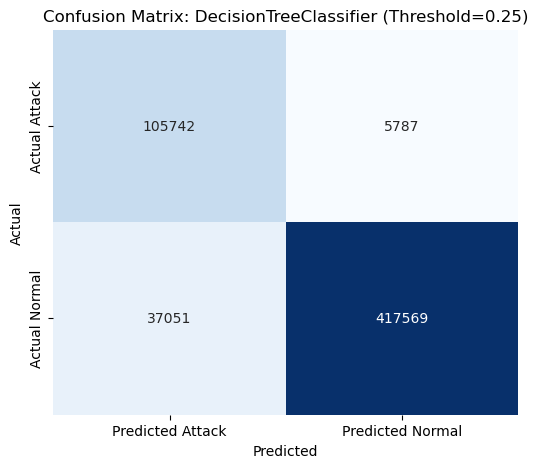

In [70]:
import joblib

# Load the model from your local Windows path
MODEL_PATH = r"C:\Users\USER\Desktop\ANIDSSS\models\DecisionTreeClassifier.joblib"
clfd = joblib.load(MODEL_PATH)

# Call the function
evaluate_classifier(
    model=clfd,
    name="DecisionTreeClassifier",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.25
)



## Random Forest


In [58]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=22,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 3},
    random_state=42,
    n_jobs=-1
)

# ✅ Train on 20 features
rf_clf.fit(X_train_final, y_train)

print("Model trained with features:", rf_clf.n_features_in_)  # must print 20


MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
joblib.dump(rf_clf, os.path.join(MODEL_DIR, "randomforest_stage1_with_20_features.joblib"))

Model trained with features: 20


['C:\\Users\\USER\\Desktop\\ANIDSSS\\models/randomforest_stage1_with_20_features.joblib']


===== RandomForest (Stage1: BENIGN vs ATTACK) Evaluation =====

Confusion Matrix (TP FN / FP TN):
[[111512     17]
 [  1855 452765]]
False Positive Rate (FPR): 0.004080

Precision (Attack): 0.9836
Recall (Attack):    0.9998
F1-score (Attack):  0.9917

Accuracy (Train): 0.9967
Accuracy (Test):  0.9967

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.98      1.00      0.99    111529

    accuracy                           1.00    566149
   macro avg       0.99      1.00      0.99    566149
weighted avg       1.00      1.00      1.00    566149



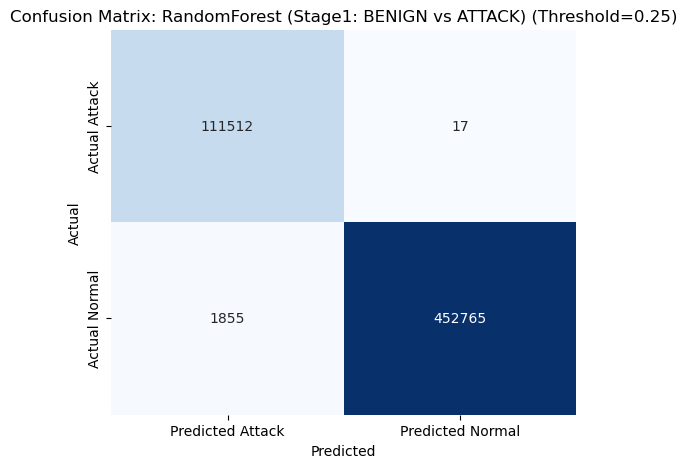

In [121]:
import joblib

MODEL_PATH = r"C:\Users\USER\Desktop\ANIDSSS\models\randomforest_stage1_with_20_features.joblib"

model = joblib.load(MODEL_PATH)

evaluate_classifier(
    model=model,
    name="RandomForest (Stage1: BENIGN vs ATTACK)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.25
)


In [75]:
import os
import joblib
from sklearn.naive_bayes import GaussianNB

# Stage-1: Normal vs Attack (0=Normal, 1=Attack)
nb_clf = GaussianNB()

nb_clf.fit(X_train_final, y_train)
print("✅ GaussianNB trained successfully.")


# Save model
MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"


joblib.dump(nb_clf, os.path.join(MODEL_DIR, "gaussianNB.joblib"))


✅ GaussianNB trained successfully.


['C:\\Users\\USER\\Desktop\\ANIDSSS\\models\\gaussianNB.joblib']


===== GaussianNB (Stage-1: Normal vs Attack) Evaluation =====

Confusion Matrix (TP FN / FP TN):
[[106635   4894]
 [344407 110213]]
False Positive Rate (FPR): 0.757571

Precision (Attack): 0.2364
Recall (Attack):    0.9561
F1-score (Attack):  0.3791

Accuracy (Train): 0.3821
Accuracy (Test):  0.3830

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.24      0.39    454620
           1       0.24      0.96      0.38    111529

    accuracy                           0.38    566149
   macro avg       0.60      0.60      0.38    566149
weighted avg       0.82      0.38      0.39    566149



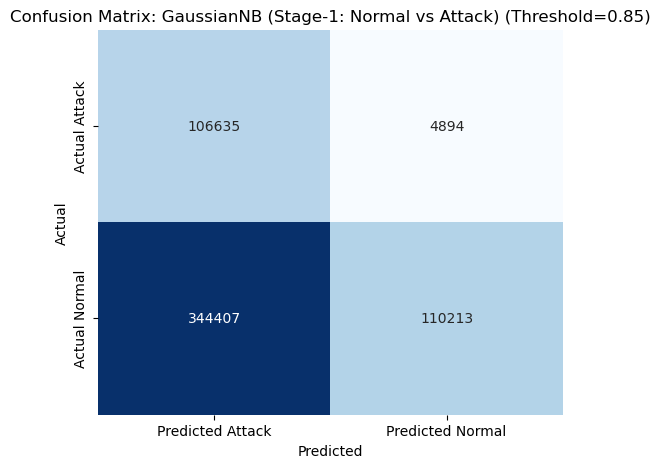

In [77]:
# Load the model from your local Windows path
MODEL_PATH = r"C:\Users\USER\Desktop\ANIDSSS\models\gaussianNB.joblib"
clfd = joblib.load(MODEL_PATH)
evaluate_classifier(
    model=nb_clf,
    name="GaussianNB (Stage-1: Normal vs Attack)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.85  # custom threshold for detecting attack
)

In [60]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [79]:
import joblib
import os
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=False
)

# Train (use the same final feature matrix you use for other models)
catboost_model.fit(X_train_final, y_train)


# Save model
MODEL_DIR = r"C:\\Users\\USER\\Desktop\\ANIDSSS\\models"
os.makedirs(MODEL_DIR, exist_ok=True)
joblib.dump(catboost_model, os.path.join(MODEL_DIR, "catboost_stage1.joblib"))


['C:\\\\Users\\\\USER\\\\Desktop\\\\ANIDSSS\\\\models\\catboost_stage1.joblib']

✅ CatBoost model loaded successfully.

===== CatBoost (Stage-1: Normal vs Attack) Evaluation =====

Confusion Matrix (TP FN / FP TN):
[[110869    660]
 [   420 454200]]
False Positive Rate (FPR): 0.000924

Precision (Attack): 0.9962
Recall (Attack):    0.9941
F1-score (Attack):  0.9952

Accuracy (Train): 0.9981
Accuracy (Test):  0.9981

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       1.00      0.99      1.00    111529

    accuracy                           1.00    566149
   macro avg       1.00      1.00      1.00    566149
weighted avg       1.00      1.00      1.00    566149



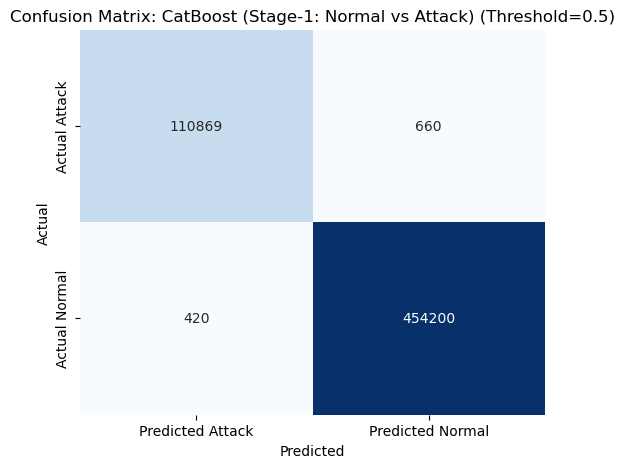

In [86]:
MODEL_PATH = r"C:\Users\USER\Desktop\ANIDSSS\models\catboost_stage1.joblib"

if os.path.exists(MODEL_PATH):
    catboost_model = joblib.load(MODEL_PATH)
    print("✅ CatBoost model loaded successfully.")
else:
    raise FileNotFoundError(f"Model file not found at: {MODEL_PATH}")

# -----------------------------
# Step 2: Evaluate the loaded model
# -----------------------------
# Use the universal evaluation function
evaluate_classifier(
    model=catboost_model,
    name="CatBoost (Stage-1: Normal vs Attack)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.5  # you can tune this threshold later
)

In [90]:
import os
import joblib
from sklearn.linear_model import LogisticRegression

# Stage-1: Normal vs Attack (0=Normal, 1=Attack)
logreg_model = LogisticRegression(
    max_iter=2000,         # avoids convergence warnings
    class_weight="balanced",  # helps if attacks are fewer than normal
    random_state=42,
    n_jobs=-1
)

# Train (use your final scaled features)
logreg_model.fit(X_train_final, y_train)


joblib.dump(
    logreg_model,
    os.path.join(MODEL_DIR, "logreg_stage1_normal_vs_attack.joblib")
)


['C:\\Users\\USER\\Desktop\\ANIDS\\models\\logreg_stage1_normal_vs_attack.joblib']

✅ CatBoost model loaded successfully.

===== LogisticRegression (Stage-1: Normal vs Attack) Evaluation =====

Confusion Matrix (TP FN / FP TN):
[[ 47453  64076]
 [  5634 448986]]
False Positive Rate (FPR): 0.012393

Precision (Attack): 0.8939
Recall (Attack):    0.4255
F1-score (Attack):  0.5765

Accuracy (Train): 0.8771
Accuracy (Test):  0.8769

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    454620
           1       0.89      0.43      0.58    111529

    accuracy                           0.88    566149
   macro avg       0.88      0.71      0.75    566149
weighted avg       0.88      0.88      0.86    566149



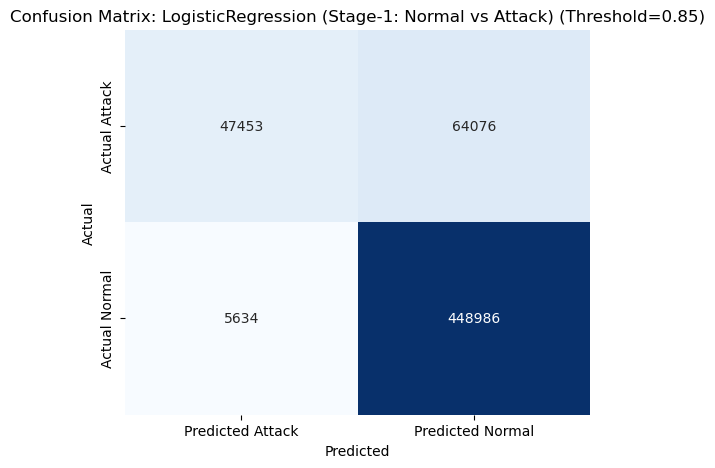

In [89]:

MODEL_PATH = r"C:\Users\USER\Desktop\ANIDSSS\models\logreg_stage1_normal_vs_attack.joblib"

if os.path.exists(MODEL_PATH):
    c = joblib.load(MODEL_PATH)
    print("✅ extratrees_stage1.joblib model loaded successfully.")
else:
    raise FileNotFoundError(f"Model file not found at: {MODEL_PATH}")

# Evaluate using your existing function
evaluate_classifier(
    model=logreg_model,
    name="LogisticRegression (Stage-1: Normal vs Attack)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.85
)


# ExtratTreeClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import joblib
import os

et_stage1 = ExtraTreesClassifier(
    n_estimators=600,          # strong ensemble
    max_depth=24,              # controls overfitting
    min_samples_leaf=2,        # stable leaves
    max_features="sqrt",       # randomness
    class_weight={0: 1, 1: 3}, # handle imbalance
    random_state=42,
    n_jobs=-1
)

et_stage1.fit(X_train_final, y_train)



# Save model
MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
joblib.dump(et_stage1, os.path.join(MODEL_DIR, "extratrees_stage1.joblib"))



===== ExtraTrees (Stage-1: Normal vs Attack) =====

Confusion Matrix (TP FN / FP TN):
[[ 94867  16662]
 [   308 454312]]
False Positive Rate (FPR): 0.000677

Precision (Attack): 0.9968
Recall (Attack):    0.8506
F1-score (Attack):  0.9179

Accuracy (Train): 0.9702
Accuracy (Test):  0.9700

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    454620
           1       1.00      0.85      0.92    111529

    accuracy                           0.97    566149
   macro avg       0.98      0.92      0.95    566149
weighted avg       0.97      0.97      0.97    566149



['C:\\Users\\USER\\Desktop\\ANIDSSS\\models\\extratrees_stage1.joblib']

✅ extra_tree model loaded successfully.

===== ExtraTrees (Stage-1: Normal vs Attack) Evaluation =====

Confusion Matrix (TP FN / FP TN):
[[     0 111529]
 [     0 454620]]
False Positive Rate (FPR): 0.000000

Precision (Attack): 0.0000
Recall (Attack):    0.0000
F1-score (Attack):  0.0000

Accuracy (Train): 0.8030
Accuracy (Test):  0.8030

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    454620
           1       0.00      0.00      0.00    111529

    accuracy                           0.80    566149
   macro avg       0.40      0.50      0.45    566149
weighted avg       0.64      0.80      0.72    566149



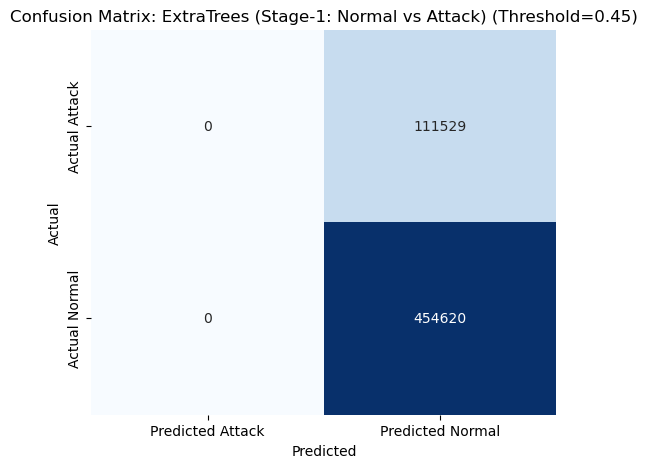

In [100]:

MODEL_PATH = r"C:\Users\USER\Desktop\ANIDSSS\models\extratrees_stage1.joblib"

if os.path.exists(MODEL_PATH):
    extra_tree = joblib.load(MODEL_PATH)
    print("✅ extra_tree model loaded successfully.")
else:
      raise FileNotFoundError(f"Model file not found at: {MODEL_PATH}")
# Evaluate
evaluate_classifier(
    model=extra_tree,
    name="ExtraTrees (Stage-1: Normal vs Attack)",
    X_train=X_train_final,
    X_test=X_test_final,
    y_train=y_train,
    y_test=y_test,
    threshold=0.45
)

# Map to group attack types

In [95]:
def map_attack_group(label: str) -> str:
    label = str(label).strip()

    if label == "BENIGN":
        return "BENIGN"

    # DoS family
    if label in ["DoS-Hulk", "DoS-GoldenEye", "DoS-slowloris", "DoS-Slowhttptest"]:
        return "DoS"

    # DDoS
    if label == "DDoS":
        return "DDoS"

    # PortScan
    if label == "PortScan":
        return "PortScan"

    # Brute Force
    if label in ["FTP-Patator", "SSH-Patator"]:
        return "BruteForce"

    # Web attacks
    if label in ["Web-Attack-Brute-Force", "Web-Attack-XSS", "Web-Attack-Sql-Injection"]:
        return "WebAttack"

    # Bot
    if label == "Bot":
        return "Bot"

    # Rare classes
    if label in ["Heartbleed", "Infiltration"]:
        return "OtherAttack"

    return "OtherAttack"


# STAGE-2 DATA = ONLY ATTACK FLOWS (exclude BENIGN)

In [96]:
df["Label_raw"] = df["Label"].astype(str).str.strip()
df["AttackGroup"] = df["Label_raw"].apply(map_attack_group)

# Stage-1 binary label (helper)
df["Stage1Label"] = (df["AttackGroup"] != "BENIGN").astype(int)

print(df["AttackGroup"].value_counts())



AttackGroup
BENIGN         2273097
DoS             252661
PortScan        158930
DDoS            128027
BruteForce       13835
WebAttack         2180
Bot               1966
OtherAttack         47
Name: count, dtype: int64


# Build Stage-2 dataset (attacks only)

In [103]:
df_attack = df[df["AttackGroup"] != "BENIGN"].copy()

X2 = df_attack[top_features].copy()
y2 = df_attack["AttackGroup"].copy()

print(X2.shape)
print(y2.value_counts())


(557646, 20)
AttackGroup
DoS            252661
PortScan       158930
DDoS           128027
BruteForce      13835
WebAttack        2180
Bot              1966
OtherAttack        47
Name: count, dtype: int64


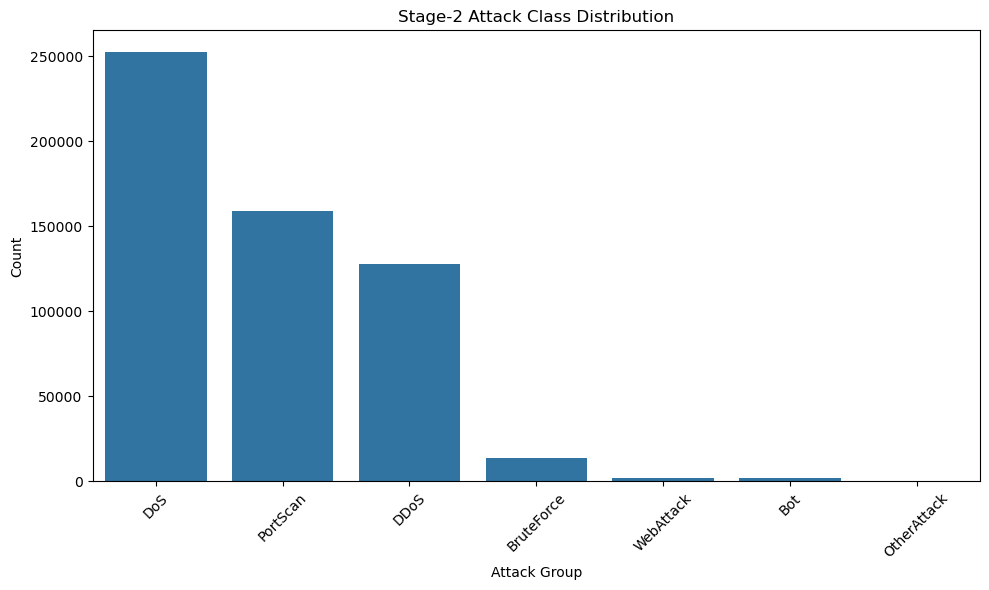

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.countplot(
    x=y2,
    order=y2.value_counts().index
)

plt.xticks(rotation=45)
plt.title("Stage-2 Attack Class Distribution")
plt.xlabel("Attack Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


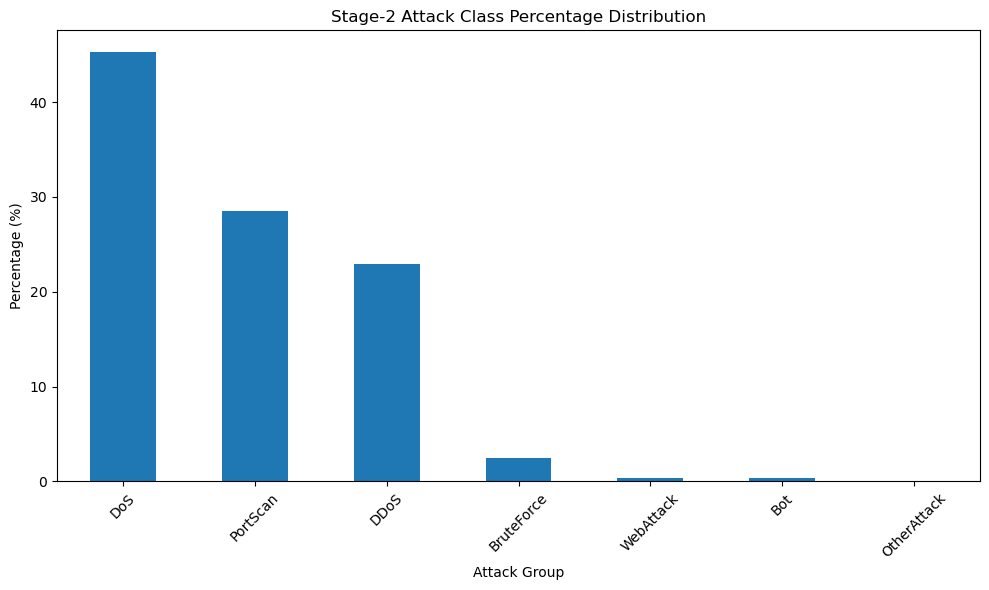

In [117]:
attack_percent = y2.value_counts(normalize=True) * 100

plt.figure(figsize=(10,6))
attack_percent.plot(kind='bar')

plt.title("Stage-2 Attack Class Percentage Distribution")
plt.xlabel("Attack Group")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [104]:

df["Label"].value_counts()

Label
BENIGN                      2273097
DoS-Hulk                     231073
PortScan                     158930
DDoS                         128027
DoS-GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS-slowloris                  5796
DoS-Slowhttptest               5499
Bot                            1966
Web-Attack-Brute-Force         1507
Web-Attack-XSS                  652
Infiltration                     36
Web-Attack-Sql-Injection         21
Heartbleed                       11
Name: count, dtype: int64

In [105]:

df_stage2 = df[df["AttackGroup"] != "BENIGN"].copy()

# Encode y2

In [106]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
y2_enc = le2.fit_transform(y2)


In [107]:
import joblib
import os

MODEL_DIR = r"C:\\Users\\USER\\Desktop\\ANIDSSS\\models"
os.makedirs(MODEL_DIR, exist_ok=True)
joblib.dump(le2, os.path.join(MODEL_DIR, "label_encoder_stage2_top20_feature.joblib"))
print("Saved label_encoder_stage2_top20.joblib")


Saved label_encoder_stage2_top20.joblib


# Train test split

In [108]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2_enc, test_size=0.2, random_state=42, stratify=y2_enc
)


In [109]:
from catboost import CatBoostClassifier

In [110]:
from catboost import CatBoostClassifier

stage2_model = CatBoostClassifier(
    loss_function="MultiClass",
    eval_metric="TotalF1",
    auto_class_weights="Balanced",
    iterations=1200,
    depth=6,
    learning_rate=0.06,
    random_seed=42,
    verbose=200,
    od_type="Iter",
    od_wait=200
)

stage2_model.fit(
    X2_train, y2_train,
    eval_set=(X2_test, y2_test),
    use_best_model=True
)
joblib.dump(stage2_model, os.path.join(MODEL_DIR, "stage2_catboost.joblib"))

0:	learn: 0.8448867	test: 0.8297436	best: 0.8297436 (0)	total: 526ms	remaining: 10m 30s
200:	learn: 0.9996086	test: 0.9996236	best: 0.9996236 (175)	total: 1m 40s	remaining: 8m 19s
400:	learn: 0.9996810	test: 0.9997035	best: 0.9997063 (310)	total: 3m 6s	remaining: 6m 11s
600:	learn: 0.9997092	test: 0.9997290	best: 0.9997290 (568)	total: 4m 22s	remaining: 4m 21s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9997290256
bestIteration = 568

Shrink model to first 569 iterations.


['C:\\\\Users\\\\USER\\\\Desktop\\\\ANIDSSS\\\\models\\stage2_catboost.joblib']

Accuracy: 0.9993723661795033

Classification Report:
               precision    recall  f1-score   support

         Bot       1.00      1.00      1.00       393
  BruteForce       1.00      1.00      1.00      2767
        DDoS       1.00      1.00      1.00     25606
         DoS       1.00      1.00      1.00     50533
 OtherAttack       1.00      1.00      1.00         9
    PortScan       1.00      1.00      1.00     31786
   WebAttack       0.90      1.00      0.94       436

    accuracy                           1.00    111530
   macro avg       0.98      1.00      0.99    111530
weighted avg       1.00      1.00      1.00    111530

Labels order: ['Bot', 'BruteForce', 'DDoS', 'DoS', 'OtherAttack', 'PortScan', 'WebAttack']

Confusion Matrix:
 [[  393     0     0     0     0     0     0]
 [    0  2767     0     0     0     0     0]
 [    0     0 25602     4     0     0     0]
 [    0     0     6 50503     0     0    24]
 [    0     0     0     0     9     0     0]
 [    0     0

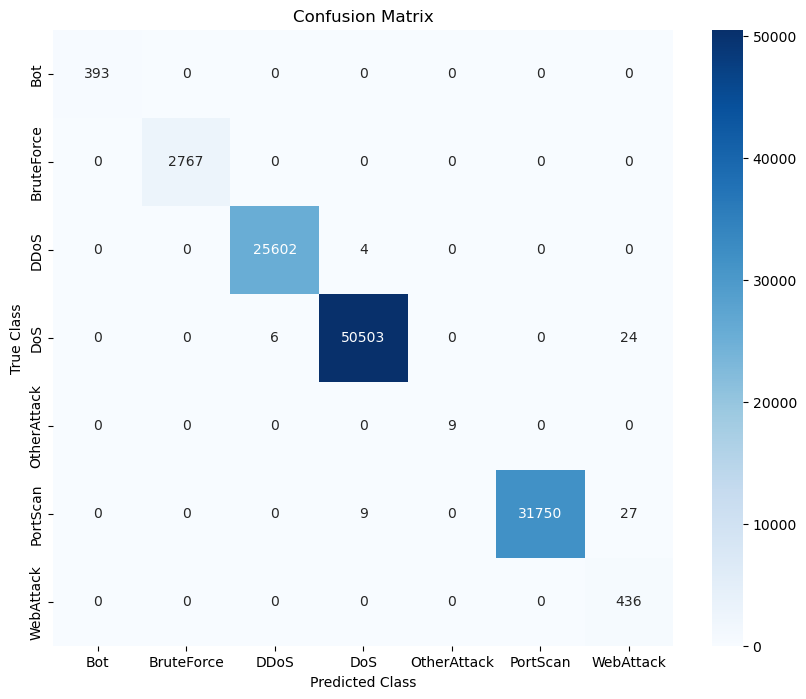

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# predict class index (0..K-1)
pred_enc = stage2_model.predict(X2_test).astype(int).reshape(-1)

# decode to class names
y_true = le2.inverse_transform(y2_test)
y_pred = le2.inverse_transform(pred_enc)

# accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# get labels
labels = list(le2.classes_)

# confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)
print("Labels order:", labels)
print("\nConfusion Matrix:\n", cm)

# plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [112]:
import pandas as pd

cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)


             Bot  BruteForce   DDoS    DoS  OtherAttack  PortScan  WebAttack
Bot          393           0      0      0            0         0          0
BruteForce     0        2767      0      0            0         0          0
DDoS           0           0  25602      4            0         0          0
DoS            0           0      6  50503            0         0         24
OtherAttack    0           0      0      0            9         0          0
PortScan       0           0      0      9            0     31750         27
WebAttack      0           0      0      0            0         0        436


# stacking ensemble

In [113]:
import joblib
import os
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

MODEL_DIR = r"C:\Users\USER\Desktop\ANIDS\models"
os.makedirs(MODEL_DIR, exist_ok=True)

base_estimators = [
    ("rf", RandomForestClassifier(
        n_estimators=400,
        max_depth=26,
        min_samples_leaf=2,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )),
    ("et", ExtraTreesClassifier(
        n_estimators=700,
        max_depth=28,
        min_samples_leaf=2,
        max_features="sqrt",
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )),
    ("cb", CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.08,
        loss_function="MultiClass",
        random_seed=42,
        verbose=False
    ))
]

meta = LogisticRegression(
    max_iter=6000,
    n_jobs=-1,
    class_weight="balanced"
)

stage2_stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta,
    stack_method="predict_proba",
    cv=3,
    n_jobs=-1,
    passthrough=False
)

stage2_stack.fit(X2_train, y2_train)



StackingClassifier(cv=3,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=26,
                                                       min_samples_leaf=2,
                                                       n_estimators=400,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('et',
                                ExtraTreesClassifier(class_weight='balanced',
                                                     max_depth=28,
                                                     min_samples_leaf=2,
                                                     n_estimators=700,
                                                     n_jobs=-1,
                                                     random_state=42)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x0000023412D33230>)],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      max_iter=6000,
                                                      n_jobs=-1),
                   n_jobs=-1, stack_method='predict_proba')

In [114]:
import joblib
import os

MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Save Stage-2 stacking model
joblib.dump(stage2_stack, os.path.join(MODEL_DIR, "stage2_stack.joblib"))

print("Saved Stage-2 stacking model successfully!")


Saved Stage-2 stacking model successfully!


Accuracy: 0.9992468394154039

Classification Report:
               precision    recall  f1-score   support

         Bot       1.00      1.00      1.00       393
  BruteForce       1.00      1.00      1.00      2767
        DDoS       1.00      1.00      1.00     25606
         DoS       1.00      1.00      1.00     50533
 OtherAttack       0.28      1.00      0.44         9
    PortScan       1.00      1.00      1.00     31786
   WebAttack       0.90      1.00      0.95       436

    accuracy                           1.00    111530
   macro avg       0.88      1.00      0.91    111530
weighted avg       1.00      1.00      1.00    111530

Labels order: ['Bot', 'BruteForce', 'DDoS', 'DoS', 'OtherAttack', 'PortScan', 'WebAttack']

Confusion Matrix:
 [[  392     0     0     0     1     0     0]
 [    0  2767     0     0     0     0     0]
 [    0     0 25594     3     9     0     0]
 [    0     0     0 50498    13     0    22]
 [    0     0     0     0     9     0     0]
 [    0     0

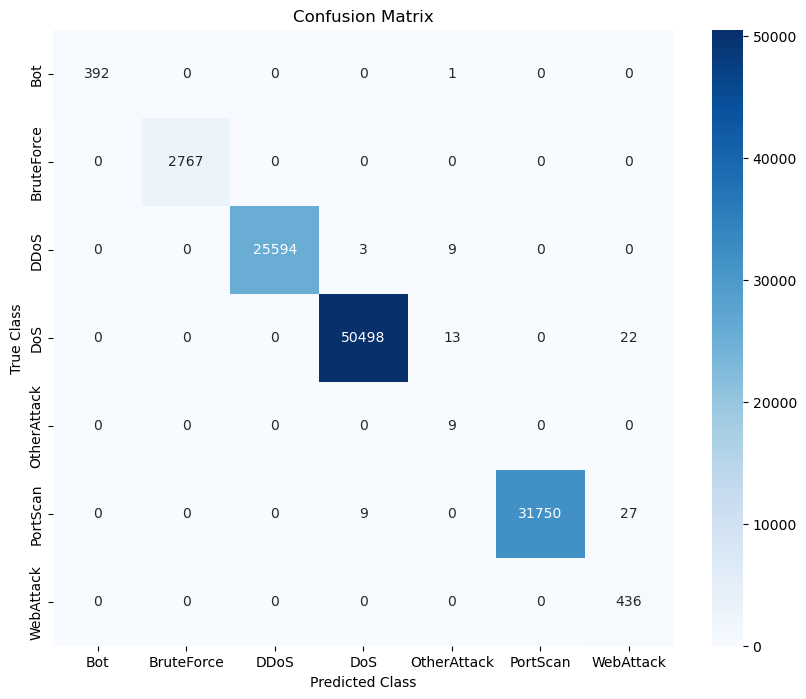

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Make predictions
y_pred_enc = stage2_stack.predict(X2_test)  # predicted class indices
y_true = y2_test  # true labels

# 2️⃣ If you have a LabelEncoder (le2) for class names
y_pred = le2.inverse_transform(y_pred_enc)
y_true_names = le2.inverse_transform(y_true)

# 3️⃣ Accuracy
print("Accuracy:", accuracy_score(y_true_names, y_pred))

# 4️⃣ Classification report
print("\nClassification Report:\n", classification_report(y_true_names, y_pred))

# 5️⃣ Confusion matrix
labels = list(le2.classes_)
cm = confusion_matrix(y_true_names, y_pred, labels=labels)
print("Labels order:", labels)
print("\nConfusion Matrix:\n", cm)

# 6️⃣ Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


## random mix data



In [ ]:
# Save a mixed sample (balanced-ish)
df_mixed_test = (
    pd.concat([
        df[df["Label"]=="BENIGN"].sample(5000, random_state=42),
        df[df["Label"]!="BENIGN"].sample(5000, random_state=42)
    ])
    .sample(frac=1, random_state=42)
)

df_mixed_test.to_csv("mixed_test_full_labels.csv", index=False)
print("Saved mixed_test_full_labels.csv", df_mixed_test.shape)


Saved mixed_test_full_labels.csv (10000, 81)


In [ ]:
X_test.head(10).to_csv("test_first_X_10.csv", index=False)
y_test.head(10).to_csv("test_first_y_10.csv", index=False)


## last 10 row


In [ ]:
X_test.tail(10).to_csv("test_last_X_10.csv", index=False)
y_test.tail(10).to_csv("test_last_y_10.csv", index=False)


## middle 10 row


In [ ]:
mid_start = len(X_test) // 2 - 5
mid_end = mid_start + 10

X_test.iloc[mid_start:mid_end].to_csv("test_middle_X_10.csv", index=False)
y_test.iloc[mid_start:mid_end].to_csv("test_middle_y_10.csv", index=False)


## random 10 data

In [ ]:
X_random_20 = X_test.sample(n=20, random_state=42)
y_random_20 = y_test.loc[X_random_20.index]

X_random_20.to_csv("test_random_X_20.csv", index=False)
y_random_20.to_csv("test_random_y_20.csv", index=False)


# map the attack group

In [97]:
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

df["Label_raw"] = df["Label"].astype(str).str.strip()
df["AttackGroup"] = df["Label_raw"].apply(map_attack_group)

# ground truth for overall evaluation (multi-class)
y_overall = df["AttackGroup"].copy()

# stage-1 ground truth (binary)
y_stage1 = (df["AttackGroup"] != "BENIGN").astype(int)


In [106]:
y_overall.head

<bound method NDFrame.head of 0          BENIGN
1          BENIGN
2          BENIGN
3          BENIGN
4          BENIGN
            ...  
2830738    BENIGN
2830739    BENIGN
2830740    BENIGN
2830741    BENIGN
2830742    BENIGN
Name: AttackGroup, Length: 2830743, dtype: object>

# load the top 20 features

In [107]:
from joblib import load
import os


PROJECT_DIR = r"C:\Users\USER\Desktop\ANIDSSS"
MODEL_DIR = os.path.join(PROJECT_DIR, "models")

os.makedirs(MODEL_DIR, exist_ok=True)
MODEL_DIR = r"C:\Users\USER\Desktop\ANIDSSS\models"

top_features = load(os.path.join(MODEL_DIR, "most_imp20_features.joblib"))

print("Top features loaded:", len(top_features))
print(top_features)

Top features loaded: 20
['Init_Win_bytes_forward', 'Destination Port', 'Max Packet Length', 'Average Packet Size', 'Min Packet Length', 'Bwd Packet Length Min', 'Init_Win_bytes_backward', 'Avg Bwd Segment Size', 'Fwd Packet Length Mean', 'Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Packet Length Variance', 'Packet Length Mean', 'Bwd Packet Length Std', 'Avg Fwd Segment Size', 'URG Flag Count', 'Fwd Header Length']


In [108]:
# Use the same top-20 feature list you used in notebook
X = df[top_features].copy()


In [109]:
X.head()

,Init_Win_bytes_forward,Destination Port,Max Packet Length,Average Packet Size,Min Packet Length,Bwd Packet Length Min,Init_Win_bytes_backward,Avg Bwd Segment Size,Fwd Packet Length Mean,Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Variance,Packet Length Mean,Bwd Packet Length Std,Avg Fwd Segment Size,URG Flag Count,Fwd Header Length
0,33,54865,6,9.0,6,0,-1,0.0,6.0,0.0,0,0.0,6,6,0.0,6.0,0.0,6.0,0,40
1,29,55054,6,9.0,6,6,256,6.0,6.0,0.0,6,6.0,6,6,0.0,6.0,0.0,6.0,1,20
2,29,55055,6,9.0,6,6,256,6.0,6.0,0.0,6,6.0,6,6,0.0,6.0,0.0,6.0,1,20
3,31,46236,6,9.0,6,6,329,6.0,6.0,0.0,6,6.0,6,6,0.0,6.0,0.0,6.0,1,20
4,32,54863,6,9.0,6,0,-1,0.0,6.0,0.0,0,0.0,6,6,0.0,6.0,0.0,6.0,0,40


In [110]:
X.shape

(2830743, 20)

# split data for recreate test set

In [111]:
X_train, X_test, y_train_overall, y_test_overall, y_train_stage1, y_test_stage1 = train_test_split(
    X, y_overall, y_stage1,
    test_size=0.2,
    random_state=42,
    stratify=y_overall
)



In [112]:
print(y_test_overall.value_counts())


AttackGroup
BENIGN         454620
DoS             50532
PortScan        31786
DDoS            25606
BruteForce       2767
WebAttack         436
Bot               393
OtherAttack         9
Name: count, dtype: int64


In [113]:
stage1_model = joblib.load(r"C:\Users\USER\Desktop\ANIDSSS\models\randomforest_stage1_with_20_features.joblib")
stage2_model = joblib.load(r"C:\Users\USER\Desktop\ANIDSSS\models\stage2_catboost.joblib")
le2 = joblib.load(r"C:\Users\USER\Desktop\ANIDSSS\models\label_encoder_stage2_top20_feature.joblib")


In [114]:
# Stage-1 predictions (0/1)
stage1_pred = stage1_model.predict(X_test)

final_pred = []

for i in range(len(X_test)):
    if stage1_pred[i] == 0:
        # predicted normal
        final_pred.append("BENIGN")
    else:
        # predicted attack => Stage-2
        p2 = stage2_model.predict(X_test.iloc[i].values.reshape(1, -1))
        p2 = np.array(p2).astype(int).reshape(-1)   # ensure correct shape
        final_pred.append(le2.inverse_transform(p2)[0])

final_pred = np.array(final_pred, dtype=str)


In [115]:
# Stage-1 predictions (0/1)
stage1_pred = stage1_model.predict(X_test)

final_pred = []

for i in range(len(X_test)):
    if stage1_pred[i] == 0:
        # predicted normal
        final_pred.append("BENIGN")
    else:
        # predicted attack => Stage-2
        p2 = stage2_model.predict(X_test.iloc[i].values.reshape(1, -1))
        p2 = np.array(p2).astype(int).reshape(-1)   # ensure correct shape
        final_pred.append(le2.inverse_transform(p2)[0])

final_pred = np.array(final_pred, dtype=str)


===== Overall Two-Stage ANIDS Performance =====
Overall Accuracy: 0.9970078548226704
Weighted F1: 0.9975925623137043
Macro F1: 0.8990908794419643

Classification Report:
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    454620
         Bot       0.71      0.99      0.83       393
  BruteForce       1.00      1.00      1.00      2767
        DDoS       1.00      1.00      1.00     25606
         DoS       1.00      1.00      1.00     50532
 OtherAttack       1.00      0.89      0.94         9
    PortScan       0.99      1.00      1.00     31786
   WebAttack       0.28      0.98      0.43       436

    accuracy                           1.00    566149
   macro avg       0.87      0.98      0.90    566149
weighted avg       1.00      1.00      1.00    566149


Confusion Matrix Labels: ['BENIGN', 'Bot', 'BruteForce', 'DDoS', 'DoS', 'OtherAttack', 'PortScan', 'WebAttack']
[[453023    157      0      5    164      0    187   1084]
 [    

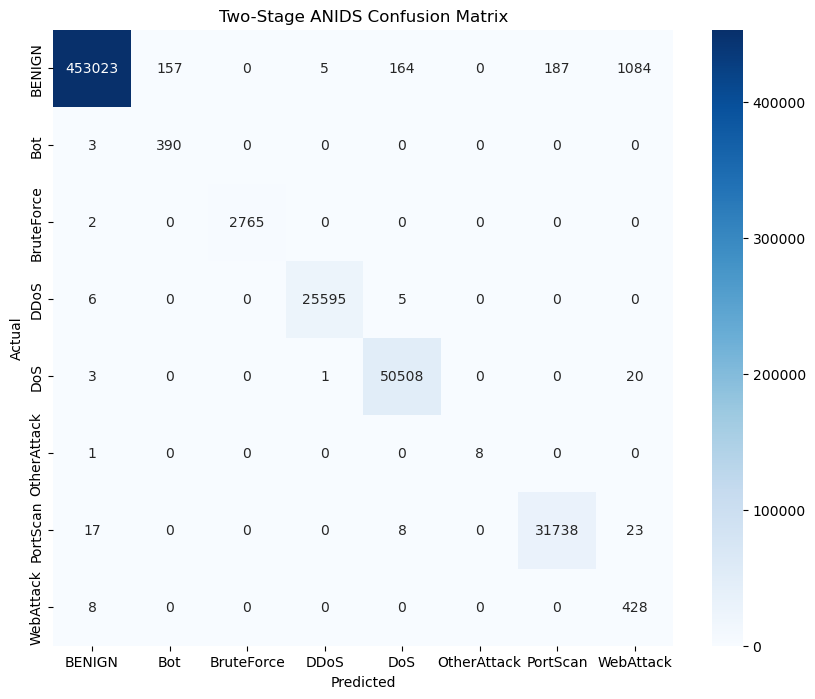

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# ===== Metrics =====
overall_acc = accuracy_score(y_test_overall, final_pred)
weighted_f1 = f1_score(y_test_overall, final_pred, average="weighted")
macro_f1 = f1_score(y_test_overall, final_pred, average="macro")

print("===== Overall Two-Stage ANIDS Performance =====")
print("Overall Accuracy:", overall_acc)
print("Weighted F1:", weighted_f1)
print("Macro F1:", macro_f1)

print("\nClassification Report:\n", classification_report(y_test_overall, final_pred))

# ===== Confusion Matrix =====
labels = ["BENIGN"] + list(le2.classes_)  # BENIGN + attack groups
cm = confusion_matrix(y_test_overall, final_pred, labels=labels)

print("\nConfusion Matrix Labels:", labels)
print(cm)

# ===== Plot Confusion Matrix =====
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Two-Stage ANIDS Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
